In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_kidney_disease.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['classification'], axis=1), df['classification'], shuffle=True, test_size=0.1)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, shuffle=True, test_size=0.1)

In [8]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA()), ('svc', SVC())])

In [11]:
params = {
    'pca__n_components': np.random.randint(1, len(df.drop(['classification'], axis=1).columns, ), 3),
    'svc__C': [10 ** -3, 1, 10 ** 3],
    'svc__coef0': [0, 1],
    'svc__max_iter': [-1, 10000000],
    'svc__kernel': ['poly', 'sigmoid', 'rbf'],
    'svc__gamma': [1/(len(df) - 1), 1 / len(df), 1 / (len(df) + 1)],
    'svc__degree': np.random.randint(1, 6, 3)
}

In [12]:
grid_search = GridSearchCV(pipe, params)
grid_search.fit(x_val, y_val)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': array([15,  5, 18]),
                         'svc__C': [0.001, 1, 1000], 'svc__coef0': [0, 1],
                         'svc__degree': array([2, 1, 2]),
                         'svc__gamma': [0.002898550724637681,
                                        0.002890173410404624,
                                        0.002881844380403458],
                         'svc__kernel': ['poly', 'sigmoid', 'rbf'],
                         'svc__max_iter': [-1, 10000000]})

In [13]:
grid_search.best_params_

{'pca__n_components': 15,
 'svc__C': 1000,
 'svc__coef0': 0,
 'svc__degree': 2,
 'svc__gamma': 0.002898550724637681,
 'svc__kernel': 'sigmoid',
 'svc__max_iter': -1}

In [14]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [16]:
pca = PCA(n_components=15)
pca.fit(x_train_scaled)
x_train_pca = pca.transform(x_train_scaled)

In [21]:
svc = SVC(C = 1000, coef0 = 0, degree = 2, gamma = 0.002898550724637681, kernel = 'sigmoid', max_iter = -1)
svc.fit(x_train_pca, y_train)

SVC(C=1000, coef0=0, degree=2, gamma=0.002898550724637681, kernel='sigmoid')

In [23]:
scaler = MinMaxScaler()
scaler.fit(x_test)
x_test_scaler = scaler.transform(x_test)
pca = PCA(n_components=15)
pca.fit(x_test_scaler)
x_test_pca = pca.transform(x_test_scaler)

In [24]:
y_train_pred = svc.predict(x_train_pca)
y_test_pred = svc.predict(x_test_pca)

<Axes: >

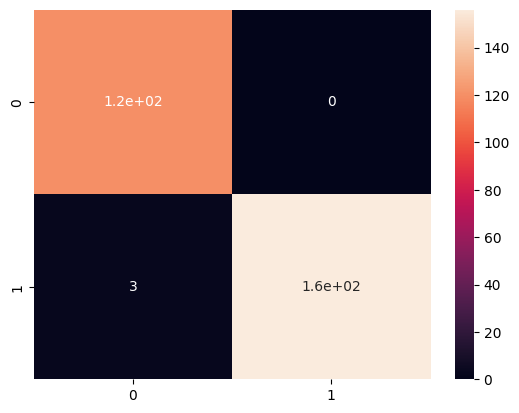

In [34]:
from sklearn.metrics import confusion_matrix
con_mat_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(con_mat_train, annot=True)

<Axes: >

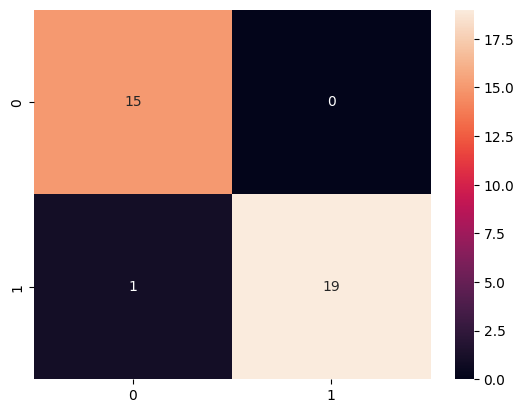

In [35]:
con_mat_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_mat_test, annot=True)

In [37]:
acc_train = (con_mat_train[0][0] + con_mat_train[1][1]) / (con_mat_train[0][0] + con_mat_train[0][1] + con_mat_train[1][0] + con_mat_train[1][1])
acc_train

0.989247311827957

In [38]:
acc_test = (con_mat_test[0][0] + con_mat_test[1][1]) / (con_mat_test[0][0] + con_mat_test[0][1] + con_mat_test[1][0] + con_mat_test[1][1])
acc_test

0.9714285714285714